## Color quantization of images with k-means and fuzzy k-means.

In [1]:
import cv2
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from math import exp
import matplotlib.pyplot as plt
import pandas as pd
from itertools import combinations,combinations_with_replacement
import scipy
import skfuzzy as fuzz
%matplotlib inline

In [2]:
image1 = cv2.imread('/home/user/Downloads/3_бактерии.jpg')
image2 = cv2.imread('/home/user/Downloads/3_бактерии2.jpg')
#fix to rgb channel
gray1 = cv2.cvtColor(image1, cv2.COLOR_BGR2RGB)
gray2 = cv2.cvtColor(image2, cv2.COLOR_BGR2RGB)

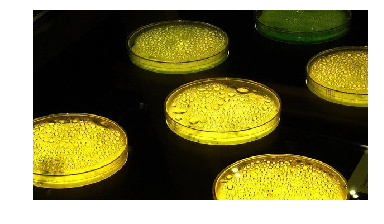

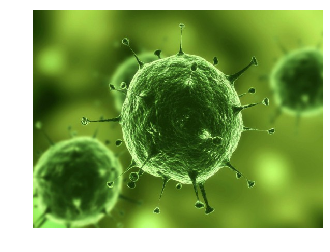

In [3]:
plt.imshow(gray1)
plt.axis('off')
plt.show()
plt.imshow(gray2)
plt.axis('off')
plt.show()

In [8]:
gray1 = gray1.reshape((-1, 3))
gray2 = gray2.reshape((-1, 3))
#image as matrix
im1_matrix = np.asarray(gray1, dtype=np.float32)
im2_matrix = np.asarray(gray2, dtype=np.float32)

In [10]:
# kmeans with opencv, flag - parameter for clusters init
def cv2_kmeans(im_matrix: np.ndarray, num_clust: int, flag):
    criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)
    ret,label,center=cv2.kmeans(data=im_matrix,K=num_clust, bestLabels=None, 
                                criteria=criteria,attempts=10,flags=flag)
    center = np.uint8(center)
    res = center[label.flatten()]
    return ret, res, label

In [6]:
# calculating of xie-beni quality metric for clustering (only on 20000 points, because of time amd memory)
# xie-beni index - ratio between inner cluster distance to difference cluster distance
def sum_pairwise_manhatten_distances(A, B):
    return np.sum(scipy.spatial.distance.cdist(A, B, 'cityblock'))
def xie_beni_index(ret_value, labels):
    diff_clust_sum = float()
    inner_clust_sum = float()
    combs =combinations_with_replacement(labels.label.unique(), 2)
    if ret_value == None:
        for item in combs:
            cl_points1 = np.asarray(list(labels[labels['label']==item[0]]['pixel'].values), dtype=np.uint8)
            cl_points2 = np.asarray(list(labels[labels['label']==item[1]]['pixel'].values), dtype=np.uint8)
            if item[0]!=item[1]:
                diff_clust_sum+=sum_pairwise_manhatten_distances(cl_points1[:20000], cl_points2[:20000])
            else:
                inner_clust_sum+=sum_pairwise_manhatten_distances(cl_points1[:20000], cl_points2[:20000])
        ret_value=inner_clust_sum
    else:
        for item in combs:
            if item[0]!=item[1]:
                cl_points1 = np.asarray(list(labels[labels['label']==item[0]]['pixel'].values), dtype=np.uint8)
                cl_points2 = np.asarray(list(labels[labels['label']==item[1]]['pixel'].values), dtype=np.uint8)
                diff_clust_sum+=sum_pairwise_manhatten_distances(cl_points1[:20000], cl_points2[:20000])
            else:
                pass
    return ret_value/(diff_clust_sum+1e-13)

Number of clusters: 1

Xie-Beni index value: 35145385856785417502720.000


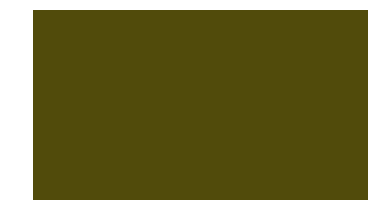

Number of clusters: 2

Xie-Beni index value: 0.004


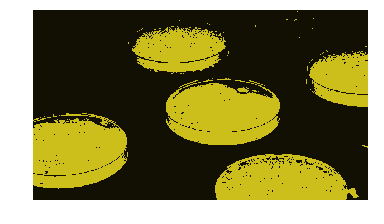

Number of clusters: 3

Xie-Beni index value: 0.001


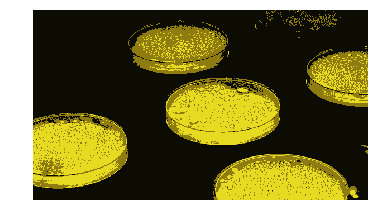

Number of clusters: 4

Xie-Beni index value: 0.000


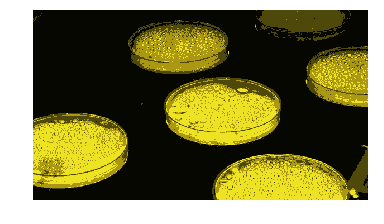

Number of clusters: 5

Xie-Beni index value: 0.000


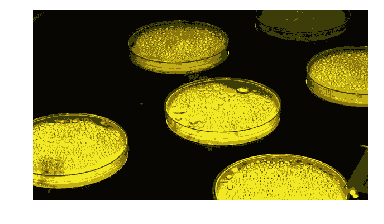

Number of clusters: 6

Xie-Beni index value: 0.000


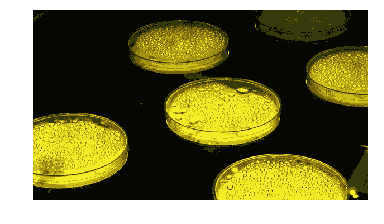

Number of clusters: 7

Xie-Beni index value: 0.000


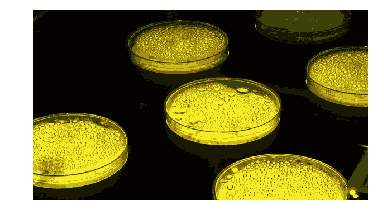

Number of clusters: 8

Xie-Beni index value: 0.000


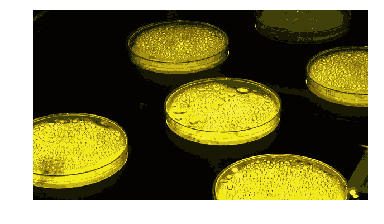

Number of clusters: 9

Xie-Beni index value: 0.000


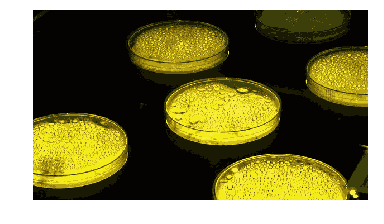

Number of clusters: 10

Xie-Beni index value: 0.000


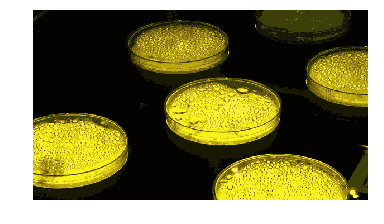

In [12]:
#for first image with PP clusters initializations, varying number of clusters from 1 to 10
for i in range(1,11):
    print("Number of clusters: {}".format(i))
    ret, res, label = cv2_kmeans(im_matrix=im1_matrix, num_clust=i, flag=cv2.KMEANS_PP_CENTERS)
    labels = pd.DataFrame(columns=['label', 'pixel'])
    labels['label']=label.flatten().tolist()
    labels['pixel'] = im1_matrix.tolist()
    print('\nXie-Beni index value: %.3f'%xie_beni_index(ret_value=ret, labels=labels))
    plt.imshow(res.reshape((image1.shape)))
    plt.axis("off")
    plt.show()

Number of clusters: 1
Xie-Beni index value: 12222044867721173139456.000


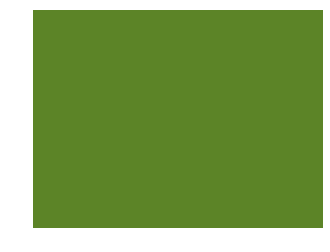

Number of clusters: 2
Xie-Beni index value: 0.006


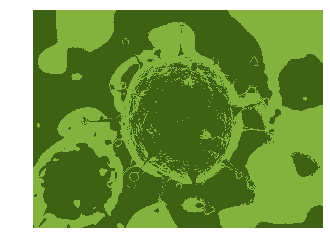

Number of clusters: 3
Xie-Beni index value: 0.001


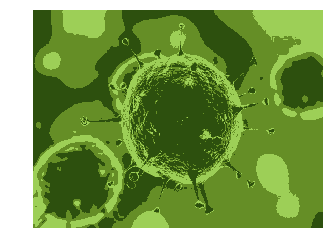

Number of clusters: 4
Xie-Beni index value: 0.000


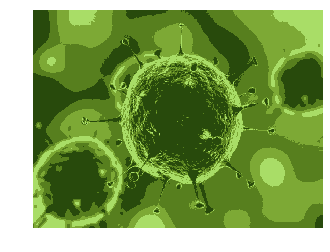

Number of clusters: 5
Xie-Beni index value: 0.000


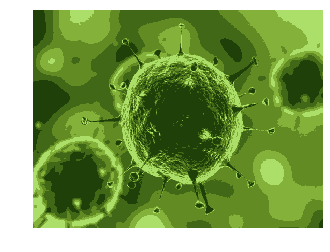

Number of clusters: 6
Xie-Beni index value: 0.000


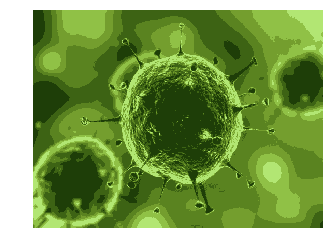

Number of clusters: 7
Xie-Beni index value: 0.000


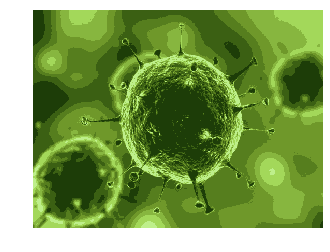

Number of clusters: 8
Xie-Beni index value: 0.000


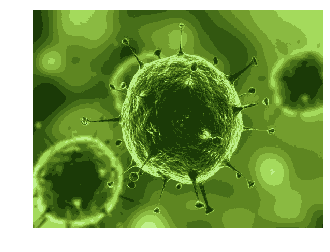

Number of clusters: 9
Xie-Beni index value: 0.000


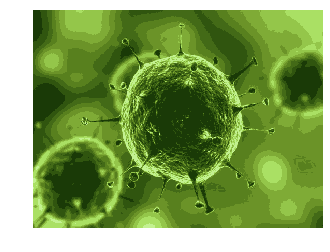

Number of clusters: 10
Xie-Beni index value: 0.000


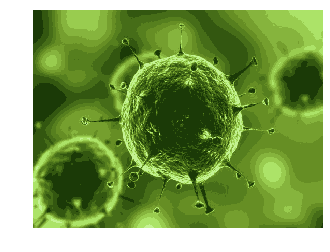

In [41]:
# for second image with PP cluster init, varying number of clusters from 1 to 10
for i in range(1,11):
    print("Number of clusters: {}".format(i))
    ret, res, label = cv2_kmeans(im_matrix=im2_matrix, num_clust=i, flag=cv2.KMEANS_PP_CENTERS)
    labels = pd.DataFrame(columns=['label', 'pixel'])
    labels['label']=label.flatten().tolist()
    labels['pixel'] = im2_matrix.tolist()
    print('Xie-Beni index value: %.3f'%xie_beni_index(ret_value=ret, labels=labels))
    plt.imshow(res.reshape((image2.shape)))
    plt.axis("off")
    plt.show()

In [4]:
def fuzzy_kmeans(im_matrix: np.ndarray, num_clust: int):
    cntr, u, *_ = fuzz.cluster.cmeans(im_matrix.transpose(), num_clust, 2, error=0.005, maxiter=1000, init=None)
    label = np.argmax(u, axis=0)
    center = np.uint8(cntr)
    res = center[label.flatten()]
    return res, label

Number of clusters: 1
Xie-Beni index value: 258864585660000001589248.000


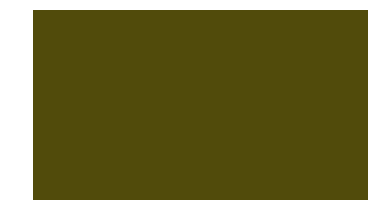

Number of clusters: 2
Xie-Beni index value: 0.528


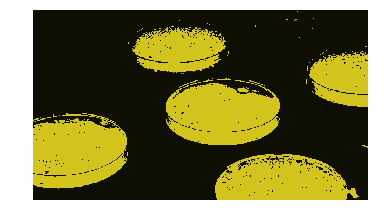

Number of clusters: 3
Xie-Beni index value: 0.253


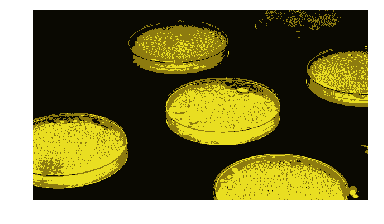

Number of clusters: 4
Xie-Beni index value: 0.135


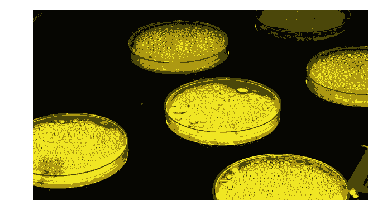

Number of clusters: 5
Xie-Beni index value: 0.093


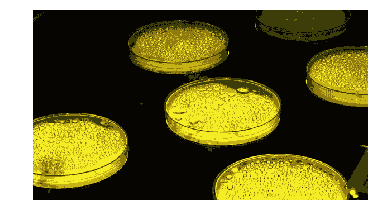

Number of clusters: 6
Xie-Beni index value: 0.068


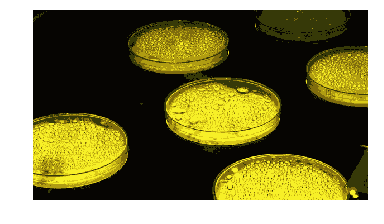

Number of clusters: 7
Xie-Beni index value: 0.050


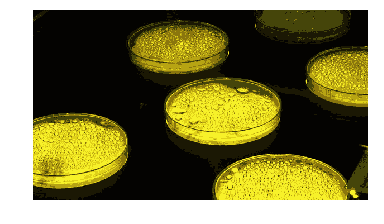

Number of clusters: 8
Xie-Beni index value: 0.040


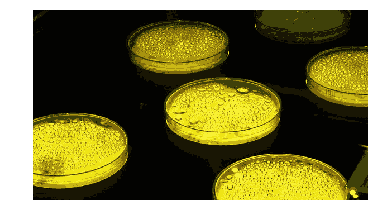

Number of clusters: 9
Xie-Beni index value: 0.033


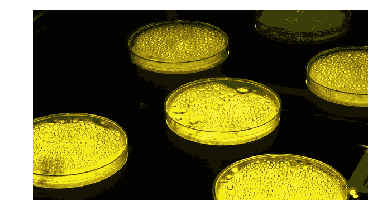

Number of clusters: 10
Xie-Beni index value: 0.028


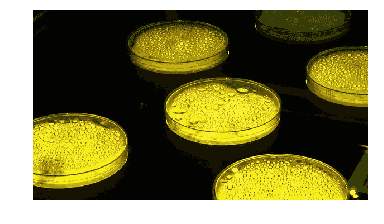

In [9]:
#for first image fuzzy k means, varying number of clusters from 1 to 10
for i in range(1,11):
    print("Number of clusters: {}".format(i))
    res, label = fuzzy_kmeans(im_matrix=im1_matrix, num_clust=i)
    labels = pd.DataFrame(columns=['label', 'pixel'])
    labels['label']=label.flatten().tolist()
    labels['pixel'] = im1_matrix.tolist()
    print('Xie-Beni index value: %.3f'%xie_beni_index(ret_value=None, labels=labels))
    plt.imshow(res.reshape((image1.shape)))
    plt.axis("off")
    plt.show()

Number of clusters: 1
Xie-Beni index value: 538429195139999995002880.000


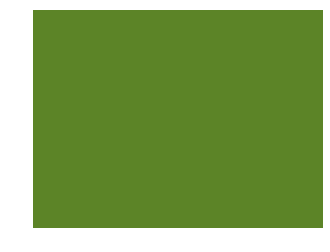

Number of clusters: 2
Xie-Beni index value: 0.665


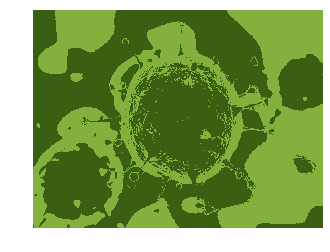

Number of clusters: 3
Xie-Beni index value: 0.293


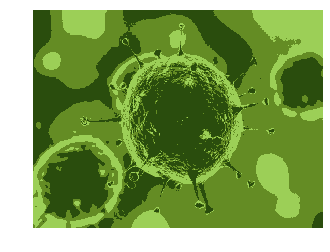

Number of clusters: 4
Xie-Beni index value: 0.163


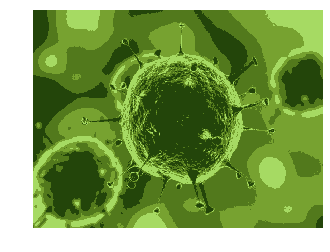

Number of clusters: 5
Xie-Beni index value: 0.103


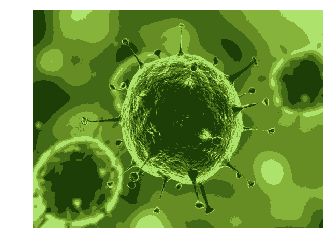

Number of clusters: 6
Xie-Beni index value: 0.075


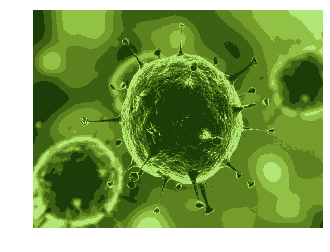

Number of clusters: 7
Xie-Beni index value: 0.062


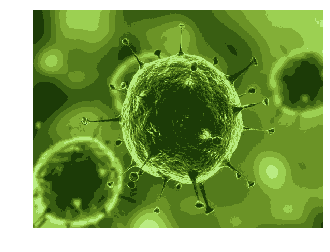

Number of clusters: 8
Xie-Beni index value: 0.050


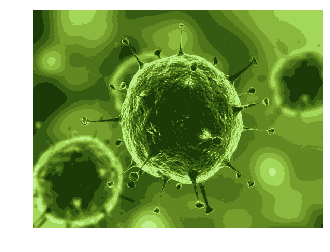

Number of clusters: 9
Xie-Beni index value: 0.042


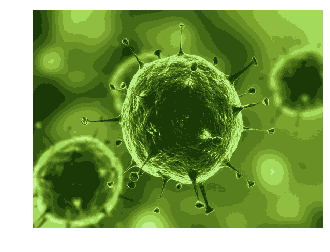

Number of clusters: 10


In [ ]:
#for second image fuzzy k means, varying number of clusters from 1 to 10
for i in range(1,11):
    print("Number of clusters: {}".format(i))
    res, label = fuzzy_kmeans(im_matrix=im2_matrix, num_clust=i)
    labels = pd.DataFrame(columns=['label', 'pixel'])
    labels['label']=label.flatten().tolist()
    labels['pixel'] = im2_matrix.tolist()
    print('Xie-Beni index value: %.3f'%xie_beni_index(ret_value=None, labels=labels))
    plt.imshow(res.reshape((image2.shape)))
    plt.axis("off")
    plt.show()